# TA Semantic Function Distribution

In [1]:
from scripts.imports import *
import json

with open(paths['cl_clusters'], 'r') as infile:
    clclusts = json.load(infile)
    
out = Exporter(
    paths['outdir'],
    'semantics'
)

cc10_books = list(clclusts['10']['bookbounds'].keys())
cc10_bbounds = list(clclusts['10']['bookbounds'].values())


In [2]:
nt_clause_df = pd.read_csv(
    paths['clause_dataset'],
    index_col='node',
    low_memory=False
)

# bind clauses with time and without together
cl_df = pd.concat([df, nt_clause_df], 0)

In [3]:
def plot_distrib(df, ax=None, title='', **kwargs):
    """Plot distribution plot."""
    kws = {
        's': 4,
        'color': 'indigo',
    }
    kws.update(kwargs)
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 3))
    sns.swarmplot(x=df.cl_clust10, ax=ax, **kws)
    ax.set_xticks(cc10_bbounds)
    ax.set_xticklabels(cc10_books, rotation=60)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.grid(axis='x')
    ax.set_axisbelow(True)

# All Time Distribution

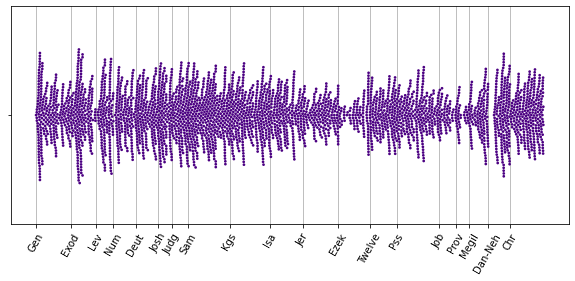

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_distrib(df, s=2.7, ax=ax) # all TAs
out.plot(
    'all_ta_distrib',
)

## All Time Genre

In [5]:
all_genre_ct = df.main_genre.value_counts()
all_genre_pr = all_genre_ct / all_genre_ct.sum()
all_genre_cp = join_ct_pr(all_genre_ct, all_genre_pr)

out.table(
    all_genre_cp,
    'all_genre_cp',
    caption='Genre Frequencies for All Time Adverbial Functions'
)

,count,percent
prose-Q,1058,31%
prose-N,996,29%
prophecy,588,17%
poetry,419,12%
instruction,322,10%


In [6]:
all_genre_ct = pivot_ct(
    cl_df,
    'has_time',
    'main_genre',
)

all_genre_ct = all_genre_ct.set_axis(['no', 'yes'], 0)
all_genre_ct.index.name = 'has time'

all_genre_pr = all_genre_ct.div(all_genre_ct.sum(1), 0)
all_genre_pc = all_genre_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    all_genre_ct,
    'allcl_genre_ct',
    caption='Genre Counts by Presence of Time Adverbial in Clause'
)

main_genre,prose-N,prophecy,prose-Q,poetry,instruction
has time,,,,,
no,19312,19230,18524,13662,7224
yes,996,588,1058,419,322


In [7]:
out.table(
    all_genre_pc,
    'allcl_genre_pc',
    caption='Genre Percentages by Presence of Time Adverbial in Clause'
)

main_genre,prose-N,prophecy,prose-Q,poetry,instruction
has time,,,,,
no,25%,25%,24%,18%,9%
yes,29%,17%,31%,12%,10%


In [8]:
all_genre_fs, all_genre_odds = sig.apply_fishers(all_genre_ct, 0, 1, sign=False, logtransform=False)

In [9]:
all_genre_fs

,prose-N,prophecy,prose-Q,poetry,instruction
no,1.624890e-09,1.671910e-23,2.458731e-22,1.007365e-15,0.628142
yes,1.624890e-09,1.671910e-23,2.458731e-22,1.007365e-15,0.628142


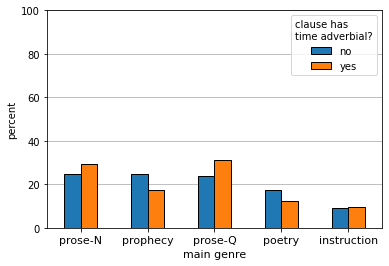

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
all_genre_pr.T.mul(100)\
    .rename_axis(columns='clause has\ntime adverbial?')\
    .plot(kind='bar', ax=ax, edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=11)
ax.set_ylim((0,100))
ax.set_xlabel('main genre', size=11)
ax.set_ylabel('percent')
ax.grid(axis='y')
ax.set_axisbelow(True)
out.plot(
    'bar_ALL_genre_pc'
)

In [11]:
out.number(
    all_genre_pr.loc['yes'][['prose-Q', 'prose-N']].sum()*100,
    'allg_prose_pc',
)

'61'

In [12]:
out.number(
    all_genre_pr.loc['yes']['prose-Q']*100,
    'allg_proseQ_pc',
)

'31'

## Simultaneous

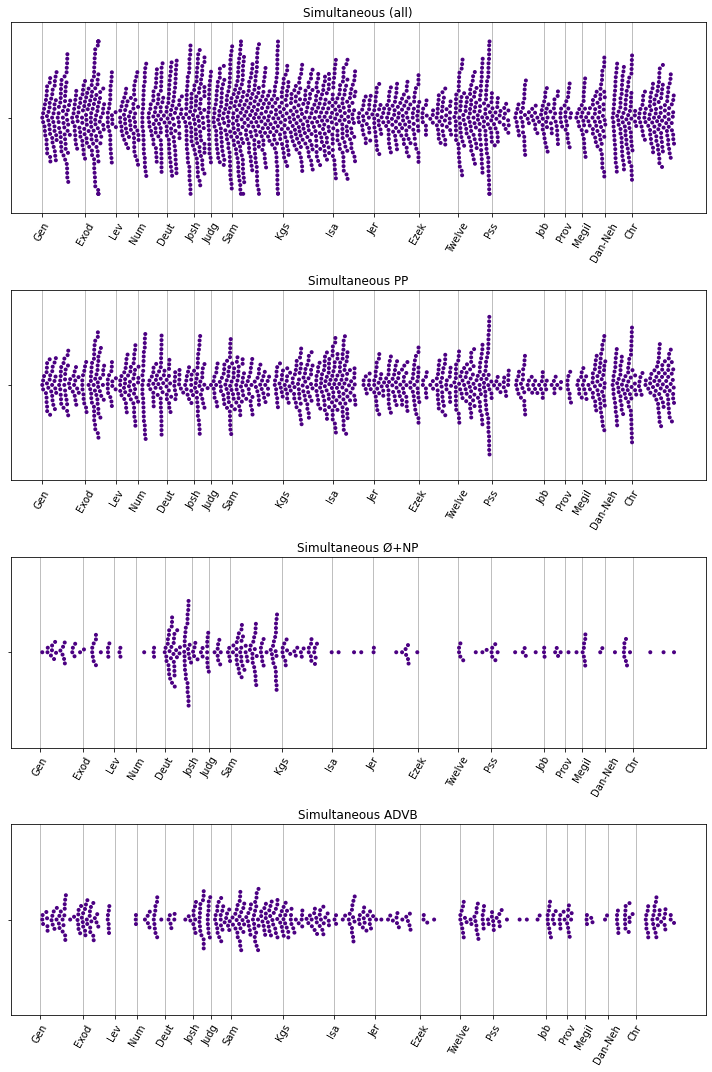

In [13]:
simul_df = df[df.function == 'simultaneous']
simprep = simul_df[
    (simul_df.is_advb == 0)
    & (simul_df.front != 'Ø')
]
simnull = simul_df[
    (simul_df.is_advb == 0)
    & (simul_df.front == 'Ø')
]
simadvb = simul_df[simul_df.is_advb == 1]

fig, axs = plt.subplots(4, 1, figsize=(10, 15))

title2data = {
    'Simultaneous (all)': simul_df,
    'Simultaneous PP': simprep,
    'Simultaneous Ø+NP': simnull,
    'Simultaneous ADVB': simadvb,
}

for title, ax in zip(title2data, axs.ravel()):
    data = title2data[title]
    plot_distrib(data, title=title, ax=ax)
    
fig.tight_layout()

out.plot(
    'distrib_simul',
)


In [14]:
simgenph_ct = pivot_ct(
    simul_df,
    'ph_type',
    'main_genre',
)
simgenph_pr = simgenph_ct.div(simgenph_ct.sum(1), 0)

simgenph_pc = simgenph_pr.mul(100).round().astype(int).astype(str) + '%'

out.table(
    simgenph_ct,
    'simgenph_ct',
    caption='Simultaneous Function Phrase Type Counts by Genre'
)

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
ph_type,,,,,
PP,186,413,260,103,116
ADVB,304,22,76,43,3
NP,213,37,17,18,7


In [15]:
out.table(
    simgenph_pc,
    'simgenph_pc',
    caption='Genre Share of Simultaneous Phrase Types'
)

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
ph_type,,,,,
PP,17%,38%,24%,10%,11%
ADVB,68%,5%,17%,10%,1%
NP,73%,13%,6%,6%,2%


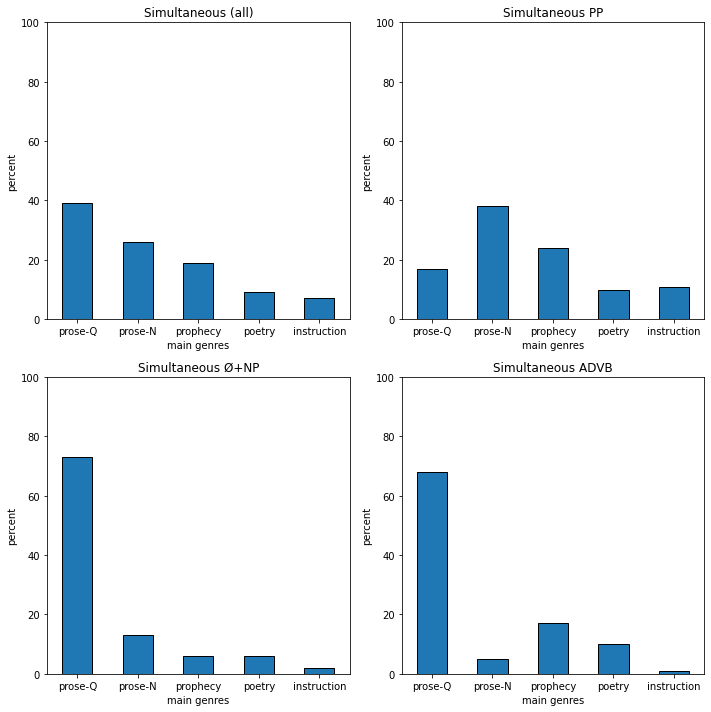

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.ravel()

for ax, title in zip(axs, title2data):
    data = title2data[title]
    genre_ct = data.main_genre.value_counts()
    genre_ct = genre_ct.loc[['prose-Q', 'prose-N', 'prophecy', 'poetry', 'instruction']] # normalize order
    genre_pr = genre_ct / genre_ct.sum()
    genre_pr.mul(100).round().astype(int).plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylabel('percent')
    ax.set_xlabel('main genres')
    ax.set_title(title)
    ax.set_ylim(0, 100)
fig.tight_layout()

out.plot(
    'bar_simgen_prs'
)

### Get Examples

I want to see what these clusters mean...

In [17]:
sp_cts = simprep.cl_clust10.value_counts()

sp_cts

1549    4
5245    4
8062    4
7836    4
1663    4
       ..
695     1
2746    1
4795    1
6846    1
6021    1
Name: cl_clust10, Length: 988, dtype: int64

In [18]:
ts.show(
    simprep[simprep.cl_clust10 == 1549]
)

showing 4 of 4


,verse,clause
node,,
443027,Numbers 19:12,ה֣וּא יִתְחַטָּא־בֹ֞ו בַּיֹּ֧ום הַשְּׁלִישִׁ֛י
443028,Numbers 19:12,וּבַיֹּ֥ום הַשְּׁבִיעִ֖י יִטְהָ֑ר
443029,Numbers 19:12,וְאִם־לֹ֨א יִתְחַטָּ֜א בַּיֹּ֧ום הַשְּׁלִישִׁ֛י
443030,Numbers 19:12,וּבַיֹּ֥ום הַשְּׁבִיעִ֖י לֹ֥א יִטְהָֽר׃


## Anterior

In [19]:
antdf = df[df.function == 'anterior']

antdf.shape

(32, 78)

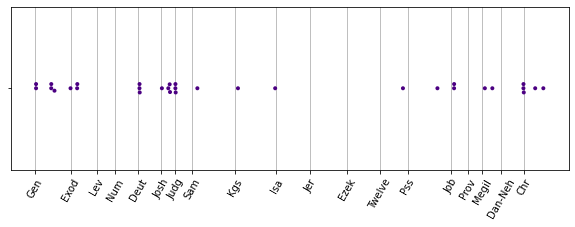

In [20]:
plot_distrib(antdf)
out.plot(
    'distrib_anterior'
)

In [24]:
antgenre_ct = pivot_ct(
    antdf,
    'front',
    'main_genre'
)

antgenre_pr = antgenre_ct.div(antgenre_ct.sum(1), 0)
antgenre_pc = antgenre_pr.mul(100).round().astype(int).astype(str)+'%'


out.table(
    antgenre_ct,
    'antgenre_ct',
    caption='Genre Counts by Anterior Type'
)


main_genre,prose-N,prose-Q,poetry,prophecy
front,,,,
ל+פנה,14,8,4,1
טרם,3,1,0,0


In [26]:
out.table(
    antgenre_pc,
    'antgenre_pc',
    caption='Genre Percentage of Anterior Type'
)

main_genre,prose-N,prose-Q,poetry,prophecy
front,,,,
ל+פנה,52%,30%,15%,4%
טרם,75%,25%,0%,0%


## Posterior

In [161]:
postdf = df[df.function == 'posterior']
postdf.shape

(225, 74)

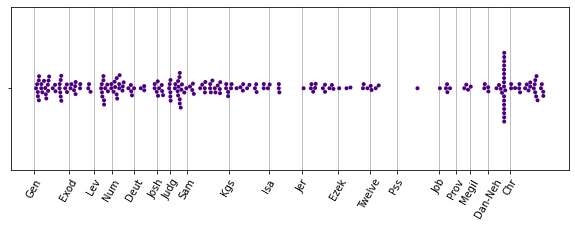

In [167]:
plot_distrib(postdf)
out.plot(
    'distrib_posterior'
)

In [195]:
ts.show(
    postdf[postdf.book == 'Nehemiah']
)

showing 17 of 17


,verse,clause,verb_utf8
node,,,
508758,Nehemiah 3:16,אַחֲרָ֤יו הֶחֱזִיק֙ נְחֶמְיָ֣ה בֶן־עַזְבּ֔וּק שַׂ֕ר חֲצִ֖י פֶּ֣לֶךְ בֵּֽית־צ֑וּר עַד־נֶ֨גֶד֙ קִבְרֵ֣י דָוִ֔יד וְעַד־הַבְּרֵכָה֙ וְעַ֖ד בֵּ֥ית הַגִּבֹּרִֽים׃ ס,חזק
508760,Nehemiah 3:17,אַחֲרָ֛יו הֶחֱזִ֥יקוּ הַלְוִיִּ֖ם רְח֣וּם בֶּן־בָּנִ֑י,חזק
508762,Nehemiah 3:18,אַחֲרָיו֙ הֶחֱזִ֣יקוּ אֲחֵיהֶ֔ם בַּוַּ֖י בֶּן־חֵנָדָ֑ד שַׂ֕ר חֲצִ֖י פֶּ֥לֶךְ קְעִילָֽה׃ ס,חזק
508765,Nehemiah 3:20,אַחֲרָ֨יו הֶחֱרָ֧ה,חרה
508767,Nehemiah 3:21,אַחֲרָ֣יו הֶחֱזִ֗יק מְרֵמֹ֧ות בֶּן־אוּרִיָּ֛ה בֶּן־הַקֹּ֖וץ מִדָּ֣ה שֵׁנִ֑ית מִפֶּ֨תַח֙ בֵּ֣ית אֶלְיָשִׁ֔יב וְעַד־תַּכְלִ֖ית בֵּ֥ית אֶלְיָשִֽׁיב׃ ס,חזק
508768,Nehemiah 3:22,וְאַחֲרָ֛יו הֶחֱזִ֥יקוּ הַכֹּהֲנִ֖ים אַנְשֵׁ֥י הַכִּכָּֽר׃,חזק
508769,Nehemiah 3:23,אַחֲרָ֨יו הֶחֱזִ֧יק בִּנְיָמִ֛ן וְחַשּׁ֖וּב נֶ֣גֶד בֵּיתָ֑ם ס,חזק
508770,Nehemiah 3:23,אַחֲרָ֣יו הֶחֱזִ֗יק עֲזַרְיָ֧ה בֶן־מַעֲשֵׂיָ֛ה בֶּן־עֲנָֽנְיָ֖ה אֵ֥צֶל בֵּיתֹֽו׃ ס,חזק
508771,Nehemiah 3:24,אַחֲרָ֣יו הֶחֱזִ֗יק בִּנּ֛וּי בֶּן־חֵנָדָ֖ד מִדָּ֣ה שֵׁנִ֑ית מִבֵּ֣ית עֲזַרְיָ֔ה עַד־הַמִּקְצֹ֖ועַ וְעַד־הַפִּנָּֽה׃,חזק


## Anterior-Durative

In [28]:
antdurdf = df[df.function == 'anterior_dur']
antdurdf.shape

(434, 78)

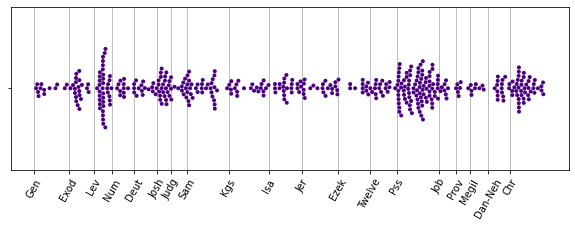

In [29]:
plot_distrib(antdurdf)
out.plot(
    'distrib_antdur'
)

In [36]:
antdur_bkct = antdurdf.booksuper.value_counts()
antdur_bkpr = antdur_bkct / antdur_bkct.sum()
antdur_bkpr

Psalms         0.205069
Chronicles     0.096774
Leviticus      0.087558
Samuel         0.076037
Joshua         0.052995
Isaiah         0.052995
Kings          0.050691
Exodus         0.048387
Jeremiah       0.048387
Twelve         0.041475
Numbers        0.032258
Deuteronomy    0.032258
Genesis        0.029954
Judges         0.027650
Ezekiel        0.027650
Ezra-Neh       0.020737
Job            0.018433
Megilloth      0.018433
Daniel         0.016129
Proverbs       0.016129
Name: booksuper, dtype: float64

In [37]:
out.number(
    antdur_bkpr['Psalms'] * 100,
    'antdur_Psalms_pc'
)

'21'

In [38]:
ts.show(
    antdurdf[antdurdf.booksuper == 'Chronicles']
)

showing 25 of 42


,verse,clause
node,,
510197,1_Chronicles 4:41,וַיַּחֲרִימֻם֙ עַד־הַיֹּ֣ום הַזֶּ֔ה
510265,1_Chronicles 5:26,וַ֠יְבִיאֵם לַחְלַ֨ח וְחָבֹ֤ור וְהָרָא֙ וּנְהַ֣ר גֹּוזָ֔ן עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ
510899,1_Chronicles 12:30,וְעַד־הֵ֨נָּה֙ מַרְבִּיתָ֔ם שֹׁמְרִ֕ים מִשְׁמֶ֖רֶת בֵּ֥ית שָׁאֽוּל׃ ס
511046,1_Chronicles 15:2,וּֽלְשָׁרְתֹ֖ו עַד־עֹולָֽם׃ ס
511156,1_Chronicles 16:15,זִכְר֤וּ לְעֹולָם֙ בְּרִיתֹ֔ו
511305,1_Chronicles 17:14,וְהַֽעֲמַדְתִּ֛יהוּ בְּבֵיתִ֥י וּבְמַלְכוּתִ֖י עַד־הָעֹולָ֑ם
511336,1_Chronicles 17:22,וַ֠תִּתֵּן אֶת־עַמְּךָ֙ יִשְׂרָאֵ֧ל׀ לְךָ֛ לְעָ֖ם עַד־עֹולָ֑ם
511341,1_Chronicles 17:23,הַדָּבָ֗ר יֵאָמֵ֖ן עַד־עֹולָ֑ם
511362,1_Chronicles 17:27,לִהְיֹ֥ות לְעֹולָ֖ם לְפָנֶ֑יךָ


In [44]:
ts.show(
    antdurdf[antdurdf.booksuper == 'Leviticus']
, spread=10)

showing 10 of 38


,verse,clause
node,,
438414,Leviticus 7:15,לֹֽא־יַנִּ֥יחַ מִמֶּ֖נּוּ עַד־בֹּֽקֶר׃
438859,Leviticus 11:31,כָּל־יִטְמָ֥א עַד־הָעָֽרֶב׃
438900,Leviticus 11:40,וְטָמֵ֥א עַד־הָעָֽרֶב׃
439414,Leviticus 15:7,וְטָמֵ֥א עַד־הָעָֽרֶב׃
439433,Leviticus 15:11,וְטָמֵ֥א עַד־הָעָֽרֶב׃
439465,Leviticus 15:19,וְכָל־יִטְמָ֥א עַד־הָעָֽרֶב׃
439503,Leviticus 15:27,וְטָמֵ֥א עַד־הָעָֽרֶב׃
440175,Leviticus 22:6,וְטָמְאָ֖ה עַד־הָעָ֑רֶב
440559,Leviticus 25:28,וְהָיָ֣ה מִמְכָּרֹ֗ו בְּיַד֙ עַ֖ד שְׁנַ֣ת הַיֹּובֵ֑ל


In [50]:
antdur_gen_ct = pivot_ct(
    antdurdf,
    'front',
    'main_genre'
)

antdur_gen_pr = antdur_gen_ct.div(antdur_gen_ct.sum(1), 0)
antdur_gen_pc = antdur_gen_pr.mul(100).round().astype(int).astype(str) + '%'

out.table(
    antdur_gen_ct,
    'antdur_gen_ct',
    caption='Anterior Durative Genre Counts by Fronted Element'
)

main_genre,poetry,prose-Q,prose-N,prophecy,instruction
front,,,,,
עד,28,79,74,34,51
ל,83,26,0,34,4
עד+ל,0,2,0,0,0


In [51]:
out.table(
        antdur_gen_pc,
        'antdur_gen_pc',
        caption='Anterior Durative Genre Percentages by Fronted Element'
)

main_genre,poetry,prose-Q,prose-N,prophecy,instruction
front,,,,,
עד,11%,30%,28%,13%,19%
ל,56%,18%,0%,23%,3%
עד+ל,0%,100%,0%,0%,0%


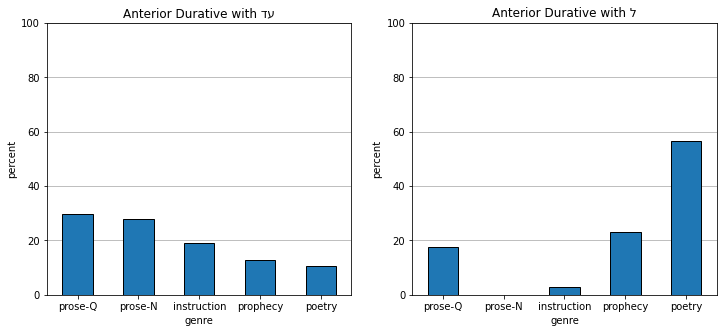

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

order = antdur_gen_pr.loc['עד'].sort_values(ascending=False).index

for ax, front in zip(axs.ravel(), ['עד', 'ל']):
    data = antdur_gen_pr.loc[front][order].mul(100)
    title = get_display(f'Anterior Durative with {front}')
    data.plot(kind='bar', ax=ax, title=title, edgecolor='black')
    ax.set_ylabel('percent')
    ax.set_xlabel('genre')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    ax.set_ylim(0, 100)
    out.plot(
        'bar_antdur_genre'
    )

## Posterior-Durative

In [76]:
postdurdf = df[df.function == 'posterior_dur']
postdurdf.shape

(67, 78)

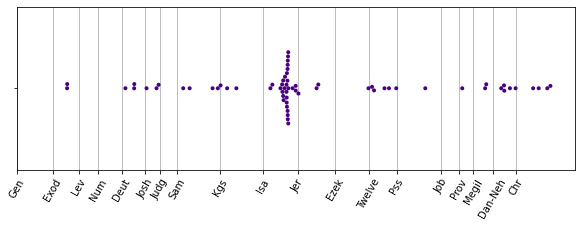

In [77]:
plot_distrib(postdurdf)
out.plot(
    'distrib_postdur'
)

In [78]:
ts.show(
    postdurdf[postdurdf.book == 'Isaiah']
, spread=30)

showing 30 of 30


,verse,clause
node,,
469373,Isaiah 16:13,אֲשֶׁ֨ר דִּבֶּ֧ר יְהוָ֛ה אֶל־מֹואָ֖ב מֵאָֽז׃
469693,Isaiah 22:11,יֹצְרָ֥הּ מֵֽרָחֹ֖וק
471018,Isaiah 37:26,אֹותָ֣הּ עָשִׂ֔יתִי מִ֥ימֵי קֶ֖דֶם
471286,Isaiah 40:21,הֲלֹ֛וא הֻגַּ֥ד מֵרֹ֖אשׁ לָכֶ֑ם
471351,Isaiah 41:4,קֹרֵ֥א הַדֹּרֹ֖ות מֵרֹ֑אשׁ
471465,Isaiah 41:26,מִֽי־הִגִּ֤יד מֵרֹאשׁ֙
471467,Isaiah 41:26,וּמִלְּפָנִ֖ים
471541,Isaiah 42:14,הֶחֱשֵׁ֨יתִי֙ מֵֽעֹולָ֔ם
471677,Isaiah 43:13,גַּם־מִיֹּום֙ אֲנִ֣י ה֔וּא


In [81]:
ts.show(
    postdurdf[
        (postdurdf.main_genre == 'instruction')
    ]
, spread=30)

showing 5 of 5


,verse,clause
node,,
435870,Exodus 21:29,וְאִ֡ם שֹׁור֩ נַגָּ֨ח ה֜וּא מִתְּמֹ֣ל שִׁלְשֹׁ֗ם
435898,Exodus 21:36,כִּ֠י שֹׁ֣ור נַגָּ֥ח הוּא֙ מִתְּמֹ֣ול שִׁלְשֹׁ֔ם
446923,Deuteronomy 19:4,וְה֛וּא לֹא־שֹׂנֵ֥א לֹ֖ו מִתְּמֹ֥ל שִׁלְשֹֽׁם׃
446939,Deuteronomy 19:6,כִּ֠י לֹ֣א שֹׂנֵ֥א ה֛וּא לֹ֖ו מִתְּמֹ֥ול שִׁלְשֹֽׁום׃
485535,Ezekiel 48:35,וְשֵׁם־הָעִ֥יר מִיֹּ֖ום


In [93]:
postdur_gen_ct = postdurdf.main_genre.value_counts()
postdur_gen_pr = postdur_gen_ct / postdur_gen_ct.sum()
postdur_gen_cp = join_ct_pr(postdur_gen_ct, postdur_gen_pr)

out.table(
    postdur_gen_cp,
    'postdur_gen_cp',
    caption='Genre Counts for Posterior Durative',
)

,count,percent
prophecy,38,58%
prose-Q,13,20%
prose-N,7,11%
instruction,5,8%
poetry,3,5%


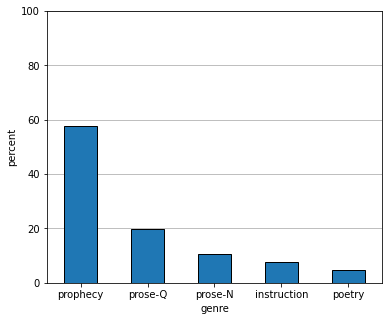

In [95]:
fig, ax = plt.subplots(figsize=(6, 5))

data = postdur_gen_pr.mul(100)
data.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
out.plot(
    'bar_postdur_genre'
)

## Distance future/past

In [184]:
distdf = df[
    (df.function == 'dist_past')
    | (df.function == 'dist_fut')
]
distdf.shape

(9, 74)

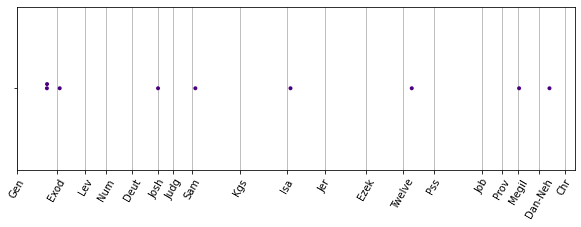

In [185]:
plot_distrib(distdf)

out.plot(
    'distrib_dist'
)

## Habitual

In [186]:
habdf = df[
    (df.function == 'habitual')
]
habdf.shape

(62, 74)

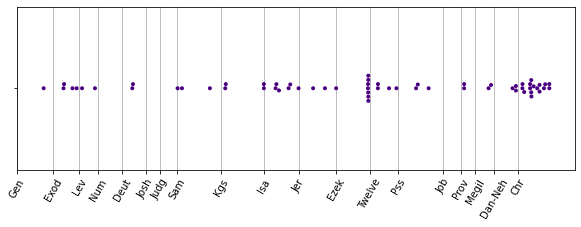

In [187]:
plot_distrib(habdf)

out.plot(
    'distrib_habitual'
)

## Atelic Extent

In [188]:
atel_df = df[df.function == 'atelic_ext']

atel_df.shape

(576, 74)

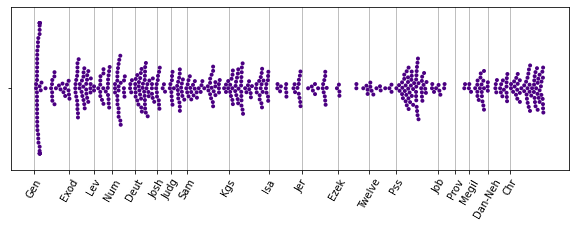

In [189]:
plot_distrib(atel_df)

out.plot(
    'distrib_atelext'
)

## Telic Extent

In [190]:
tel_df = df[df.function == 'telic_ext']
tel_df.shape

(14, 74)

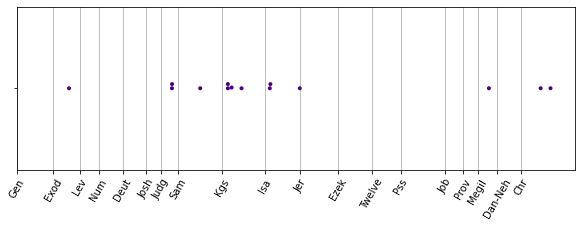

In [193]:
plot_distrib(tel_df)
out.plot('distrib_telext')

# Function by Genre

In [10]:
genre_ct = pivot_ct(
    df[
        (df.mainfunction==1)
        & (df.genre.isin(['prose', 'instruction', 'poetry', 'prophetic']))
        & (df.domain.isin(['Q', 'N']))
    ],
    ['function'],
    ['main_genre']
)

genre_ct

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,703,456,335,160,122
atelic_ext,106,196,49,80,65
anterior_dur,107,71,67,111,54
posterior,31,106,22,8,22
posterior_dur,12,7,38,3,5
habitual,8,13,10,6,13
anterior,7,3,1,3,0
telic_ext,2,6,3,1,1
dist_fut,4,0,2,0,0


In [11]:
genre_pr = genre_ct.div(genre_ct.sum(1), 0)
genre_pr2 = genre_ct.T.div(genre_ct.T.sum(1), 0)
genre_pr

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,0.395833,0.256757,0.188626,0.090090,0.068694
atelic_ext,0.213710,0.395161,0.098790,0.161290,0.131048
anterior_dur,0.260976,0.173171,0.163415,0.270732,0.131707
posterior,0.164021,0.560847,0.116402,0.042328,0.116402
posterior_dur,0.184615,0.107692,0.584615,0.046154,0.076923
habitual,0.160000,0.260000,0.200000,0.120000,0.260000
anterior,0.500000,0.214286,0.071429,0.214286,0.000000
telic_ext,0.153846,0.461538,0.230769,0.076923,0.076923
dist_fut,0.666667,0.000000,0.333333,0.000000,0.000000


### ΔP tests for genre

In [18]:
genre_dp = sig.apply_deltaP(genre_ct, 0, 1)
genre_dp2 = sig.apply_deltaP(genre_ct.T, 0, 1)

genre_dp

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,0.171114,-0.065876,0.034533,-0.080054,-0.059717
atelic_ext,-0.133480,0.133087,-0.090442,0.045693,0.045142
anterior_dur,-0.074400,-0.128131,-0.012696,0.170808,0.044418
posterior,-0.172018,0.295404,-0.061854,-0.086158,0.024627
posterior_dur,-0.143758,-0.180099,0.419245,-0.078635,-0.016753
habitual,-0.168062,-0.024320,0.026043,-0.003149,0.169489
anterior,0.175532,-0.069956,-0.103438,0.091613,-0.093750
telic_ext,-0.172176,0.178388,0.056625,-0.046374,-0.016463
dist_fut,0.342065,-0.284483,0.159262,-0.123342,-0.093501


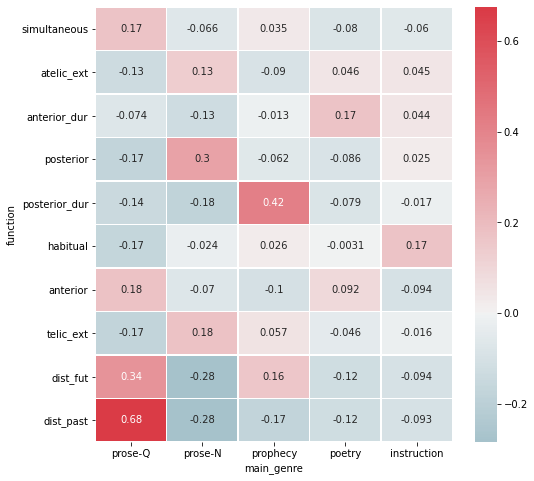

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
heatmap(genre_dp, annot=True, square=False)

## Fishers

In [21]:
genre_fs, genre_odds = sig.apply_fishers(genre_ct, 0, 1)

In [22]:
genre_fs

,prose-Q,prose-N,prophecy,poetry,instruction
simultaneous,22.749722,-4.079710,1.828135,-10.135284,-7.410301
atelic_ext,-8.566858,8.320168,-6.414863,2.247389,2.636964
anterior_dur,-2.578228,-7.446766,-0.239902,18.145225,2.225082
posterior,-6.475378,15.595433,-1.533743,-3.853535,0.608283
posterior_dur,-1.813527,-3.118026,13.199064,-1.251289,-0.081093
habitual,-1.857086,-0.058301,0.239152,0.000000,3.337814
anterior,0.782534,-0.114144,-0.312607,0.396238,-0.198053
telic_ext,-0.612936,0.671113,0.315122,0.000000,0.000000
dist_fut,1.035446,-0.714878,0.549952,0.000000,0.000000
dist_past,1.464118,-0.249483,0.000000,0.000000,0.000000


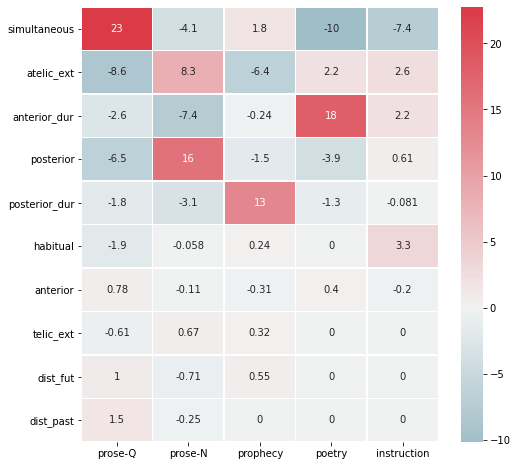

In [23]:
afig, ax = plt.subplots(figsize=(8, 8))
heatmap(genre_fs, annot=True, square=False)